<h1> Deep Autoencoders</h1>
<p>A Deep Autoencoder is a special type of neural network such as the name suggested provide encoding and decoding in an automated manner. This approach allow us to use a neural network for the encode process and another for the decode one but the training process is the same like dense networks. There exist differente kinds of autoencoders and in this implementation we'll see the most basic one: the dense Autoencoder.</p>
<p> First we are going to reuse the layer object and the neural network object with a slightly modification and we'll use these as the building blocks for our baby autoencoder, later on we are going to try with different values for the epochs and display some results for each one</p>

<h4>Reusing important functions:</h4>

In [1]:
import numpy as np
import matplotlib.pyplot as plt


def identity(x):
    return x

def identityderiv(x):
    return np.ones(x.shape)

def relu(x):
    return np.maximum(x,0)

def reluderiv(x):
    return np.heaviside(x,0)

def sigmoid(x):
    return 1/(1+np.exp(-x))

def sigmoidderiv(x):
    s = sigmoid(x)       
    s_1 = 1-s     
    return s*s_1

<h4>Reusing objects:</h4>

In [2]:
class layer():      #¿Hará falta una capa para nodos?
    def __init__(self,tipo,datos,activacion):
        self.tipo = tipo
        self.activacion = activacion
        self.input = datos
        activ_expr = activacion+'('+'datos'+')'
        self.valor = eval(activ_expr)
    def deriv(self):     
        activprim_expr = self.activacion+'deriv('+'self.input'+')'
        self.derivada = eval(activprim_expr)
        return self.derivada
    def dim(self):
        return self.valor.shape
    def __str__(self):
        return str(self.valor)
    
    
class layer():      
    def __init__(self,tipo,datos,activacion):
        self.tipo = tipo
        self.activacion = activacion
        self.input = datos
        activ_expr = activacion+'('+'datos'+')'
        self.valor = eval(activ_expr)
    def deriv(self):     
        activprim_expr = self.activacion+'deriv('+'self.input'+')'
        self.derivada = eval(activprim_expr)
        return self.derivada
    def dim(self):
        return self.valor.shape
    def __str__(self):
        return str(self.valor)
    
class NN_modified():                         
    def __init__(self,size):
        self.info = [['input',size,'identity']] 
        self.WEIGHTS = []   #Atributo de los pesos
        self.LAYERS = [layer('input',np.random.random((1,size)),self.info[0][2])]
        self.DELTAS = []    
    
    def add_layer(self,type,size,activation):   
        c = len(self.LAYERS)
        self.LAYERS.append(layer(type, np.random.random((1,size)),activation))
        self.WEIGHTS.append(0.2*np.random.random((self.LAYERS[c-1].dim()[1], size))-0.1)
        self.DELTAS.append(layer(type, np.random.random((1,size)),activation))
    
    def predict(self,X):    
        prediction = X.copy() 
        for j in range(len(self.WEIGHTS)):
            a = prediction.dot(self.WEIGHTS[j])
            L = layer(self.LAYERS[j+1].tipo,a,self.LAYERS[j+1].activacion)  
            prediction = L.valor
        return prediction
    
    def train(self,X,Y,alpha,iterations):  
        data_size = len(X)
        for j in range(iterations):
            error = 0.0
            
            for i in range(data_size):                
                self.LAYERS[0] = layer('input',X[i:i+1],'identity')
                for k in range(len(self.WEIGHTS)):
                    z_values = self.LAYERS[k].valor.dot(self.WEIGHTS[k])
                    a_values = layer(self.LAYERS[k+1].tipo,z_values,self.LAYERS[k+1].activacion)
                    self.LAYERS[k+1] = a_values
                                
                error += np.sum((Y[i:i+1]-self.LAYERS[len(self.WEIGHTS)].valor)**2)
                
                self.DELTAS[len(self.DELTAS)-1] = (Y[i:i+1]-self.LAYERS[len(self.DELTAS)].valor
                )*self.LAYERS[len(self.DELTAS)].deriv()
                
                for k in range(len(self.DELTAS)-2,-1,-1):
                    self.DELTAS[k] = self.DELTAS[k+1].dot(self.WEIGHTS[k+1].T)*self.LAYERS[k+1].deriv()
                
                for k in range(len(self.WEIGHTS)-1,-1,-1):
                    self.WEIGHTS[k] += alpha * self.LAYERS[k].valor.T.dot(self.DELTAS[k])
            
            print("\rI",f" :{j+1}/{iterations} "," Error de reconstrucción: ",error/data_size,
            sep='',end='',flush=True)

<h4>Calling MNIST handwritten digits:</h4>

In [3]:
np.random.seed(1)

from keras.datasets import mnist

(x_train,y_train), (x_test,y_test) = mnist.load_data()
images, labels  = (x_train[0:1000].reshape(1000,28**2)/255,y_train[0:1000])
one_hot_labels = np.zeros((len(labels),10))

for i,j in enumerate(labels):
    one_hot_labels[i][j] = 1
labels = one_hot_labels
##Test images from MNIST dataset for model validation and hyperparameter tunning
test_images = x_test.reshape(len(x_test),28**2)/255
test_labels = np.zeros((len(y_test),10))
for i,j in enumerate(y_test):
    test_labels[i][j] = 1
    
lr,iterations,hidden_size,pixels_per_image,num_labels = (0.005,350,40,784,10)

<h2> Creating an autoencoder </h2>

In [4]:
autoencoder = NN_modified(pixels_per_image)
autoencoder.add_layer('hidden encoder',size = 128,activation='relu')
autoencoder.add_layer('hidden encoder',size = 75,activation='relu')
autoencoder.add_layer('hidden encoder',size = 128,activation='relu')
autoencoder.add_layer('output encoder',size = pixels_per_image,activation='sigmoid')
autoencoder.train(images,images,lr,iterations)

I :350/350  Error de reconstrucción: 1.3228677102535829

<h2> Visualizing results (reconstructed images) for the autoencoder above  </h2>

Text(0, 0.5, 'Reconstructed Image')

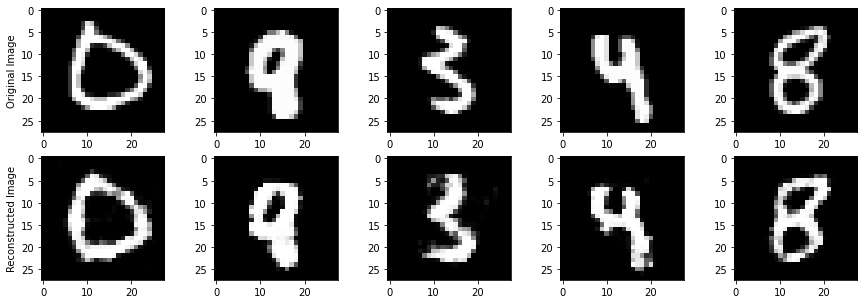

In [6]:
fig1, axs1 = plt.subplots(2, 5, figsize=(15, 5))

for i in range(5):
    index = np.random.randint(999)
    original = test_images[index:index+1]    #Try with images and test_images array
    reconstructed = autoencoder.predict(original)
    axs1[0,i].imshow(original.reshape([28,28]),cmap='gray')
    axs1[1,i].imshow(reconstructed.reshape([28,28]),cmap='gray')
    
axs1[0,0].set_ylabel('Original Image')
axs1[1,0].set_ylabel('Reconstructed Image')
        

<h2> Creating an autoencoder with 30 epochs</h2>

In [7]:
np.random.seed(30)
autoencoder_30 = NN_modified(pixels_per_image)
autoencoder_30.add_layer('hidden encoder',size = 128,activation='relu')
autoencoder_30.add_layer('hidden encoder',size = 75,activation='relu')
autoencoder_30.add_layer('hidden encoder',size = 128,activation='relu')
autoencoder_30.add_layer('output encoder',size = pixels_per_image,activation='sigmoid')
autoencoder_30.train(images,images,lr,iterations=30)

I :30/30  Error de reconstrucción: 8.2238779895629734

<h2> Visualizing results (reconstructed images) for the autoencoder above  </h2>

Text(0, 0.5, 'Reconstructed Image')

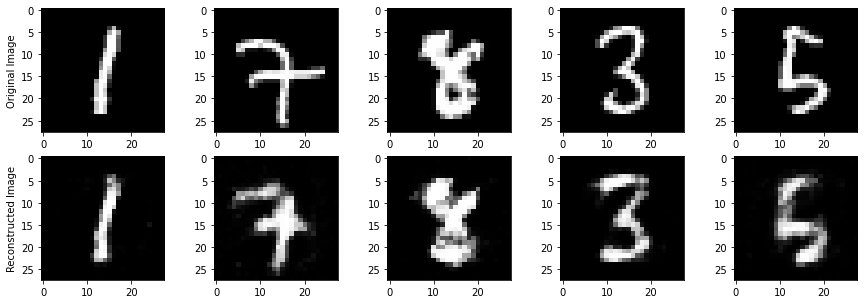

In [8]:
fig1, axs1 = plt.subplots(2, 5, figsize=(15, 5))

for i in range(5):
    index = np.random.randint(999)
    original = test_images[index:index+1]    #Try with images and test_images array
    reconstructed = autoencoder_30.predict(original)
    axs1[0,i].imshow(original.reshape([28,28]),cmap='gray')
    axs1[1,i].imshow(reconstructed.reshape([28,28]),cmap='gray')
    
axs1[0,0].set_ylabel('Original Image')
axs1[1,0].set_ylabel('Reconstructed Image')
        

<h2> Creating an autoencoder with 50 epochs</h2>

In [9]:
np.random.seed(50)
autoencoder_50 = NN_modified(pixels_per_image)
autoencoder_50.add_layer('hidden encoder',size = 128,activation='relu')
autoencoder_50.add_layer('hidden encoder',size = 75,activation='relu')
autoencoder_50.add_layer('hidden encoder',size = 128,activation='relu')
autoencoder_50.add_layer('output encoder',size = pixels_per_image,activation='sigmoid')
autoencoder_50.train(images,images,lr,iterations=50)

I :50/50  Error de reconstrucción: 5.2601907102623235

<h2> Visualizing results (reconstructed images) for the autoencoder above  </h2>

Text(0, 0.5, 'Reconstructed Image')

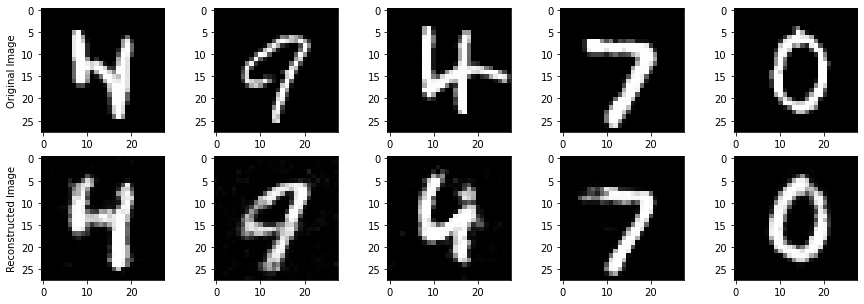

In [11]:
fig1, axs1 = plt.subplots(2, 5, figsize=(15, 5))

for i in range(5):
    index = np.random.randint(999)
    original = test_images[index:index+1]    #Try with images and test_images array
    reconstructed = autoencoder_50.predict(original)
    axs1[0,i].imshow(original.reshape([28,28]),cmap='gray')
    axs1[1,i].imshow(reconstructed.reshape([28,28]),cmap='gray')
    
axs1[0,0].set_ylabel('Original Image')
axs1[1,0].set_ylabel('Reconstructed Image')

<h2> Creating an autoencoder with 100 epochs</h2>

In [12]:
np.random.seed(100)
autoencoder_100 = NN_modified(pixels_per_image)
autoencoder_100.add_layer('hidden encoder',size = 128,activation='relu')
autoencoder_100.add_layer('hidden encoder',size = 75,activation='relu')
autoencoder_100.add_layer('hidden encoder',size = 128,activation='relu')
autoencoder_100.add_layer('output encoder',size = pixels_per_image,activation='sigmoid')
autoencoder_100.train(images,images,lr,iterations=100)

I :100/100  Error de reconstrucción: 3.1825638124458404

<h2> Visualizing results (reconstructed images) for the autoencoder above  </h2>

Text(0, 0.5, 'Reconstructed Image')

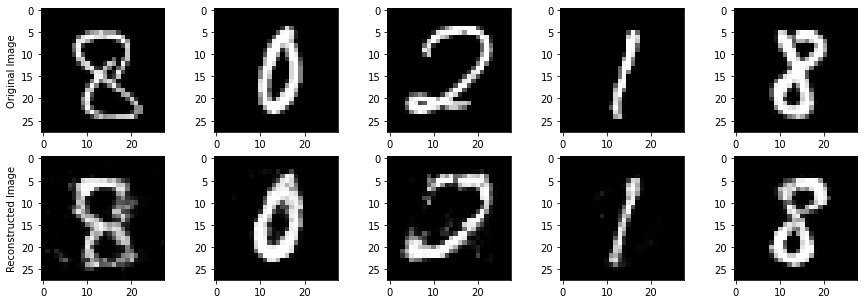

In [13]:
fig1, axs1 = plt.subplots(2, 5, figsize=(15, 5))

for i in range(5):
    index = np.random.randint(999)
    original = test_images[index:index+1]    #Try with images and test_images array
    reconstructed = autoencoder_100.predict(original)
    axs1[0,i].imshow(original.reshape([28,28]),cmap='gray')
    axs1[1,i].imshow(reconstructed.reshape([28,28]),cmap='gray')
    
axs1[0,0].set_ylabel('Original Image')
axs1[1,0].set_ylabel('Reconstructed Image')

<h2> Creating an autoencoder with 500 epochs</h2>

In [14]:
np.random.seed(500)
autoencoder_500 = NN_modified(pixels_per_image)
autoencoder_500.add_layer('hidden encoder',size = 128,activation='relu')
autoencoder_500.add_layer('hidden encoder',size = 75,activation='relu')
autoencoder_500.add_layer('hidden encoder',size = 128,activation='relu')
autoencoder_500.add_layer('output encoder',size = pixels_per_image,activation='sigmoid')
autoencoder_500.train(images,images,lr,iterations=500)

I :500/500  Error de reconstrucción: 1.1205379915932585

<h2> Visualizing results (reconstructed images) for the autoencoder above  </h2>

Text(0, 0.5, 'Reconstructed Image')

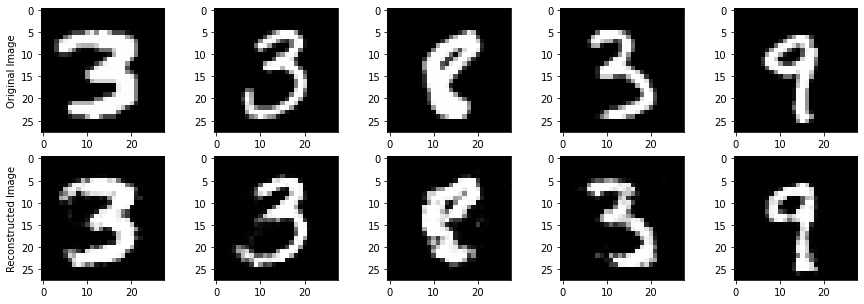

In [29]:
fig1, axs1 = plt.subplots(2, 5, figsize=(15, 5))

for i in range(5):
    index = np.random.randint(999)
    original = test_images[index:index+1]    #Try with images and test_images array
    reconstructed = autoencoder_500.predict(original)
    axs1[0,i].imshow(original.reshape([28,28]),cmap='gray')
    axs1[1,i].imshow(reconstructed.reshape([28,28]),cmap='gray')
    
axs1[0,0].set_ylabel('Original Image')
axs1[1,0].set_ylabel('Reconstructed Image')

<h2> Creating an autoencoder with 1000 epochs</h2>

In [17]:
np.random.seed(1000)
autoencoder_1000 = NN_modified(pixels_per_image)
autoencoder_1000.add_layer('hidden encoder',size = 128,activation='relu')
autoencoder_1000.add_layer('hidden encoder',size = 75,activation='relu')
autoencoder_1000.add_layer('hidden encoder',size = 128,activation='relu')
autoencoder_1000.add_layer('output encoder',size = pixels_per_image,activation='sigmoid')
autoencoder_1000.train(images,images,lr,iterations=1000)

I :1000/1000  Error de reconstrucción: 0.9131030665325955

<h2> Visualizing results (reconstructed images) for the autoencoder above  </h2>

Text(0, 0.5, 'Reconstructed Image')

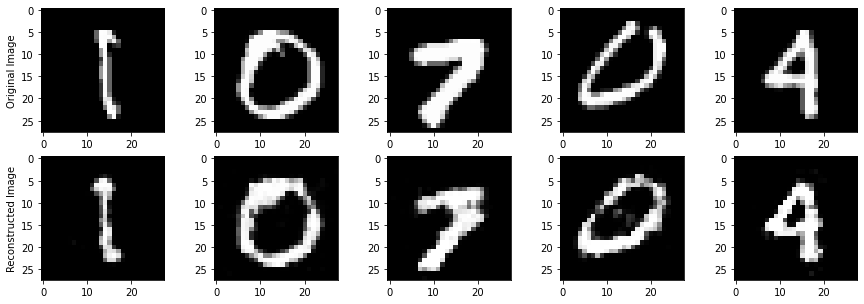

In [27]:
fig1, axs1 = plt.subplots(2, 5, figsize=(15, 5))

for i in range(5):
    index = np.random.randint(999)
    original = test_images[index:index+1]    #Try with images and test_images array
    reconstructed = autoencoder_1000.predict(original)
    axs1[0,i].imshow(original.reshape([28,28]),cmap='gray')
    axs1[1,i].imshow(reconstructed.reshape([28,28]),cmap='gray')
    
axs1[0,0].set_ylabel('Original Image')
axs1[1,0].set_ylabel('Reconstructed Image')